In [8]:
from utils.constants import input_dir, dataset_names
from utils.utils import load_dataset
import numpy as np
import matplotlib.pyplot as plt

In [86]:
x_train, y_train, x_test, y_test, num_classes, enc = load_dataset(input_dir, 'GunPointOldVersusYoung', to_categorical=True)

In [87]:
x_train.shape

(136, 150, 1)

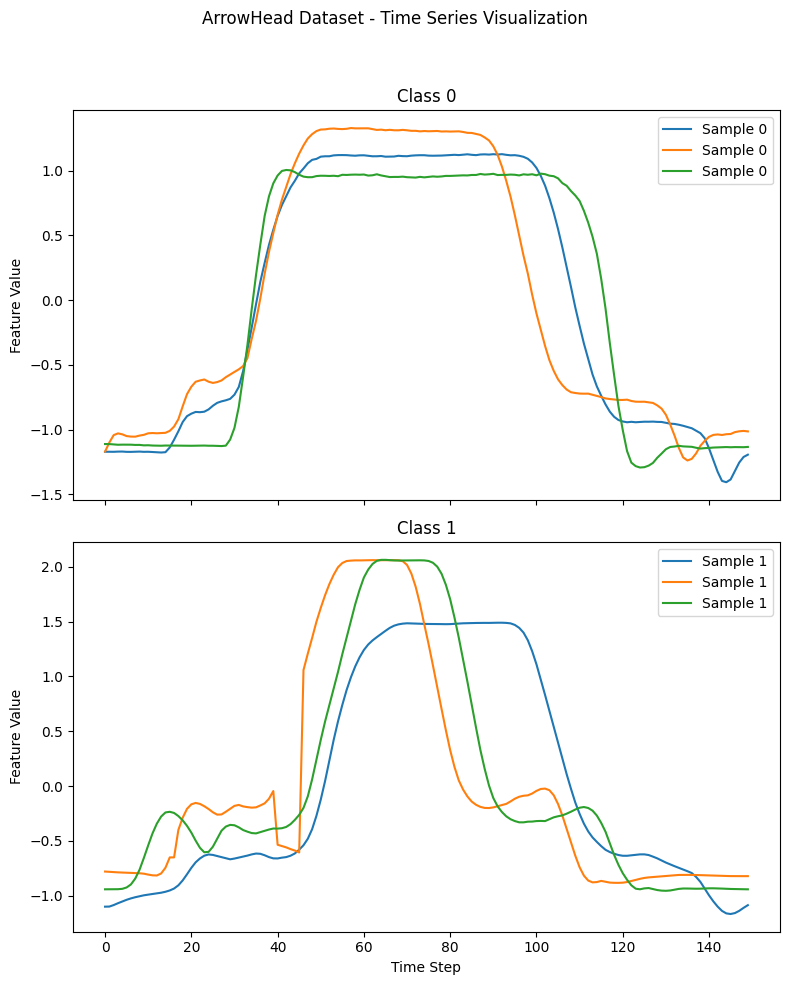

In [89]:
y_train_original = np.argmax(y_train, axis=1)

# Create subplots for each class
fig, axs = plt.subplots(nrows=num_classes, figsize=(8, 10), sharex=True)

for label in range(num_classes):
    class_indices = np.where(y_train_original == label)
    class_samples = x_train[class_indices]

    for idx, sample in enumerate(class_samples):
        axs[label].plot(sample[:, 0], label=f'Sample {label}')
        if idx >= 2:
            break
    axs[label].set_ylabel('Feature Value')
    axs[label].set_title(f'Class {label}')
    axs[label].legend()

    

axs[-1].set_xlabel('Time Step')
plt.suptitle('ArrowHead Dataset - Time Series Visualization')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [90]:
from tensorflow.keras.backend import arange

2023-08-18 16:53:55.065263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:
2023-08-18 16:53:55.065300: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [98]:
arange(0, 1, 2, dtype="float32")

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [99]:
inv_freq = 1. / (10_000 ** (arange(0, 1, 2, dtype="float32") / 1))      

In [100]:
inv_freq

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [102]:
pos_x = arange(251, dtype="float32")
pos_x

<tf.Tensor: shape=(251,), dtype=float32, numpy=
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
   

In [104]:
import tensorflow as tf

# sin_inp_x = tf.einsum("i,j->ij", pos_x, inv_freq)
# sin_inp_x

In [106]:
inv_freq = 1. / (10_000 ** (arange(0, 1, 2, dtype="float32") / 1))     
inv_freq

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [108]:
pos_x = arange(251, dtype="float32")
pos_x

<tf.Tensor: shape=(251,), dtype=float32, numpy=
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
   

In [109]:
inp_x = tf.einsum("i,j->ij", pos_x, inv_freq)
inp_x

<tf.Tensor: shape=(251, 1), dtype=float32, numpy=
array([[  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
     

In [142]:
emb = tf.zeros((251, 1))
emb.shape

TensorShape([251, 1])

In [143]:
emb.shape

TensorShape([251, 1])

In [145]:
even_updates

<tf.Tensor: shape=(126, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
 

In [144]:
import tensorflow as tf

# Create a sample 1D tensor
length = 251
one_d_tensor = tf.zeros((length, 1), dtype=tf.float32)  # Replace this with your actual data

# Assign different values to even and odd indexes
even_value = 1.0  # Use float values
odd_value = 2.0   # Use float values

even_indices = tf.range(0, length, 2)
odd_indices = tf.range(1, length, 2)

even_updates = tf.fill((even_indices.shape[0], 1), even_value)
odd_updates = tf.fill((odd_indices.shape[0], 1), odd_value)

emb = tf.tensor_scatter_nd_update(emb, tf.expand_dims(even_indices, axis=1), even_updates)
emb = tf.tensor_scatter_nd_update(emb, tf.expand_dims(odd_indices, axis=1), odd_updates)

print(emb)


tf.Tensor(
[[1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]

In [162]:
inv_freq = 1. / (10_000 ** (arange(0, 1, 2, dtype="float32") / 1))     
print('inv_freq: ', inv_freq.shape)
pos_x = arange(251, dtype="float32")

inp_x = tf.einsum("i,j->ij", pos_x, inv_freq)
sin_inp_x = tf.math.sin(inp_x[0::2])
cos_inp_x = tf.math.cos(inp_x[1::2])

emb = tf.zeros((251, 1))

even_indices = tf.range(0, 251, 2)
odd_indices = tf.range(1, 251, 2)

emb = tf.tensor_scatter_nd_update(emb, tf.expand_dims(even_indices, axis=1), sin_inp_x)
emb = tf.tensor_scatter_nd_update(emb, tf.expand_dims(odd_indices, axis=1), cos_inp_x)

emb[:10]


inv_freq:  (1,)


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 0.        ],
       [ 0.5403023 ],
       [ 0.9092974 ],
       [-0.9899925 ],
       [-0.7568025 ],
       [ 0.28366217],
       [-0.2794155 ],
       [ 0.75390226],
       [ 0.98935825],
       [-0.91113025]], dtype=float32)>

In [163]:
sin_inp_x[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 0.        ],
       [ 0.9092974 ],
       [-0.7568025 ],
       [-0.2794155 ],
       [ 0.98935825],
       [-0.54402107],
       [-0.53657293],
       [ 0.9906074 ],
       [-0.28790334],
       [-0.75098723]], dtype=float32)>